## Loading and visualizing EEG data for training of deep learning classification models

+ Import Packages
+ Loading EEG-data and metadata
+ Load events
+ Plot of EEG signal with events

TODO:
+ Prepare EEG (1. Subtract reference (mastoids), 2. Detrend, 3. Filter, 4. Remove bad channels)
+ Segment EEG into standard and deviant epochs (ERPs) (1. subtract baseline, 2. Reject artefacts, 3. Average (for each marker/subject/channel separately))
+ Calculate Mismatch response (deviant - standard for a single subject) (check differences between channels and subjects)
+ Optional: Extract features (peak latency/peak amplitude/mean amplitude/...)
+ Create fitting labels
+ Optional: Make dummy data generator
+ Input data into DL models
+ Visualise results

#### Import Packages

In [1]:
import mne
import pandas as pd
import numpy as np
import os
import glob
import copy
import sys

# Change DATA_PATH to where the the data is stored.
MAIN_PATH = os.path.dirname(os.path.dirname(os.getcwd()))
DATA_PATH = os.path.join(MAIN_PATH, 'researchdrive', 'ePodium (Projectfolder)')

from functions import display_helper
from functions import dataset_loading
from functions import epodium


#### Loading EEG-data and metadata

In [2]:
folder_epod_dataset = os.path.join(DATA_PATH, "Dataset")
folder_epod_metadata = os.path.join(DATA_PATH, "Metadata")
folder_epod_events = os.path.join(DATA_PATH, "events")

dataset_raw, dataset_filenames = dataset_loading.load_dataset(folder_epod_dataset, preload=False)

epodium_metadata_filenames = ["children.txt", "cdi.txt", "parents.txt", "CODES_overview.txt"]  
epod_children, epod_cdi, epod_parents, epod_codes = \
    dataset_loading.load_metadata(folder_epod_metadata, epodium_metadata_filenames)

206 EEG files loaded


#### Load events
+ Events are stored and loaded externally from a text file, since loading events from raw EEG file takes much longer. 
+ Set save_events_to_txt_file to true if the event markers are not yet on your disk. This will take a while. The text files are only ~4MB.

+ Information from each event can be printed given the participant and event index.

The events for four conditions are plotted from a single experiment. The events are combined so the different pronounciations or 'tokens' are not individually marked. This reduces the unique events from 78 to 12 distinct events. The pronounciations are called tokens.
+ Condition 1 GiepMT: standard "giep" - deviant "gip": multiple tokens 
+ Condition 2 GiepST: standard "giep" - deviant "gip": single token 
+ Condition 3 GopMT: standard "gop" - deviant "goep": multiple tokens 
+ Condition 4 GopST: standard "gop" - deviant "goep": single tokens

206 Event Marker files loaded
Participant 5 heard event ID: 17 after 388.5 seconds as event 500


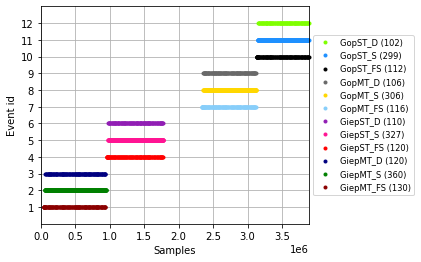

In [3]:
save_events_to_txt_file = False
if(save_events_to_txt_file):
    dataset_loading.save_events(folder_epod_events, dataset_raw, dataset_filenames)    
events = dataset_loading.load_events(folder_epod_events, dataset_filenames)

dataset_loading.print_event_info(events, participant_index = 5, event_index = 500)

events_12 = epodium.group_events_12(events)
fig = mne.viz.plot_events(events_12[4], event_id = epodium.event_dictionary, 
                          color = display_helper.color_dictionary)

#### Show data fragment of ePOD dataset

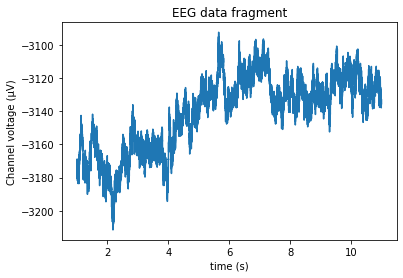

In [4]:
participant_index = 109
channel_index = 4
display_helper.show_raw_fragment(dataset_raw[participant_index], channel_index, 10,1)

#### Prepare EEG 
+ Subtract reference (mastoids) 
+ Detrend 
+ Filter
+ Remove bad channels)


#### Segment EEG into standard and deviant epochs 
+ subtract baseline
+ Reject artefacts
+ Average to get ERPs (for each subject, event, and channel separately))

#### Calculate Mismatch response 
Deviant minus (-) standard 

Check between subjects to see if the subjects have similar responses

Check between channels to observe which parts of the brain are more influenced by the events


#### Extract features 
+ peak latency
+ peak amplitude
+ mean amplitude


#### Create fitting labels


#### Input data into DL models

+ Input data X has dimensions: (subjects, trials, samples, channels)
+ Label data Y has dimensons: (subjects, trials, classes)

#### Visualise results